### Get the Data
### Download the Data

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [2]:
!pip install scikit-learn

In [7]:
import sys
assert sys.version_info >= (3, 5)

import numpy as np
import os

import sklearn
assert sklearn.__version__ >= "0.20"

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a Quick Look at the Data Structure

In [10]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Saving figure attribute_histogram_plots


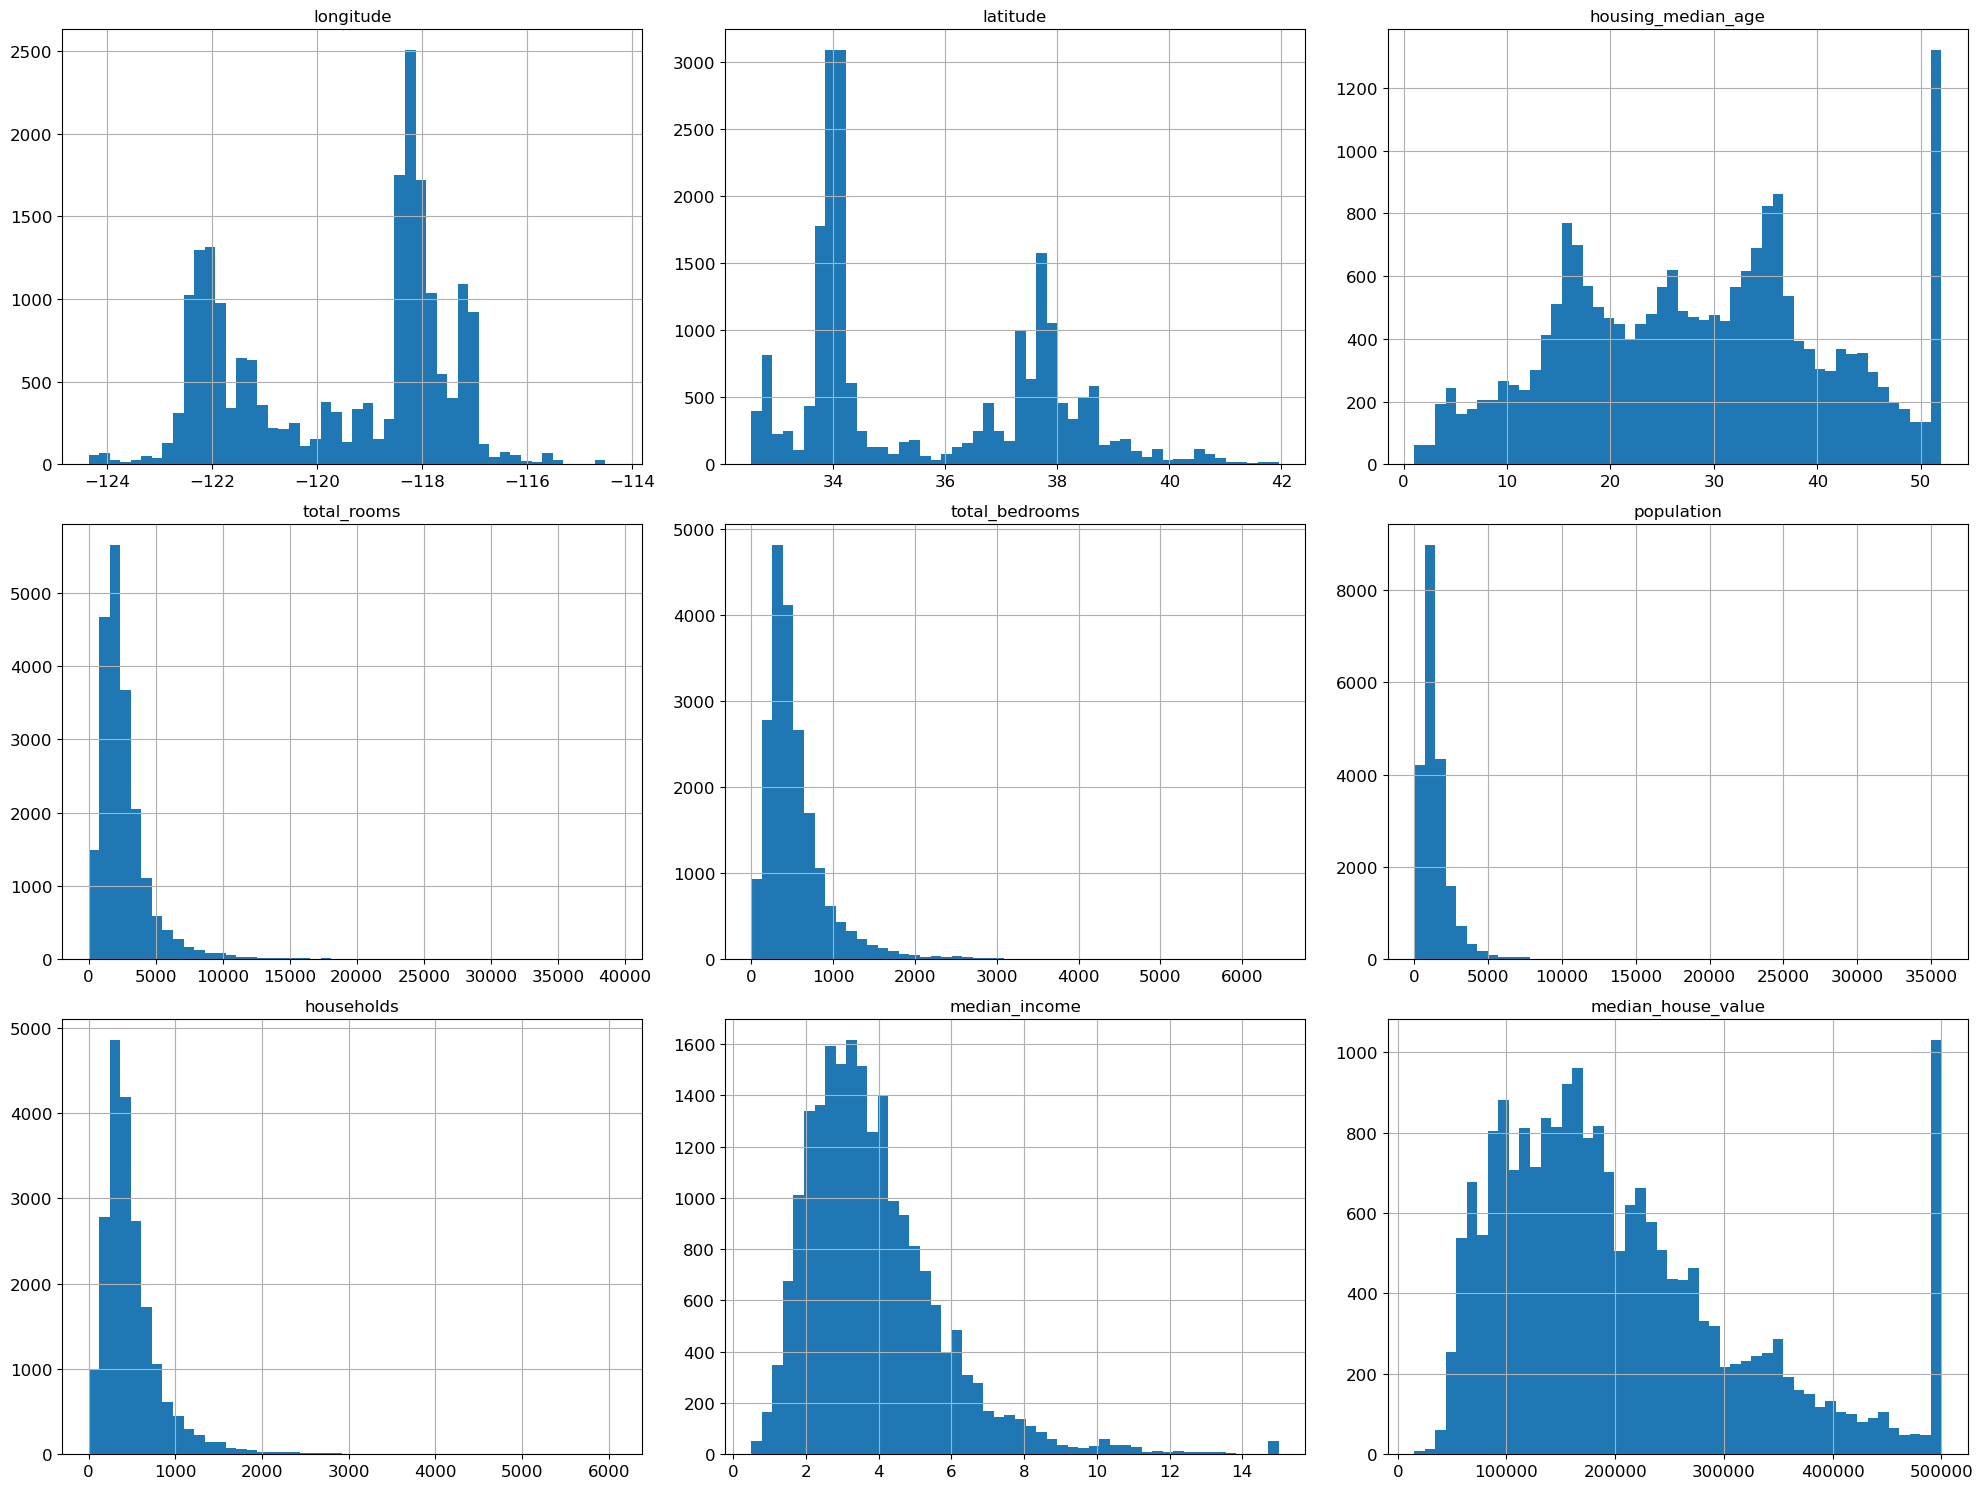

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [15]:
np.random.seed(42)

In [16]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [18]:
len(test_set)

4128

In [19]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [22]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
59     59    -122.29     37.82                 2.0        158.0   
60     60    -122.29     37.83                52.0       1121.0   
61     61    -122.29     37.82                49.0        135.0   
62     62    -122.29     37.81                50.0        760.0   
67     67    -122.29     37.80                52.0       1027.0   

    total_bedrooms  population  households  median_income  median_house_value  \
59            43.0        94.0        57.0         2.5625             60000.0   
60           211.0       554.0       187.0         3.3929             75700.0   
61            29.0        86.0        23.0         6.1183             75000.0   
62           190.0       377.0       122.0         0.9011             86100.0   
67           244.0       492.0       147.0         2.6094             81300.0   

   ocean_proximity         id  
59        NEAR BAY -122252.18  
60        NEAR BAY -122252.17  
61        NEAR BAY -122252.18  
62        NEAR BAY -122252.19  
67        NEAR BAY -122252.20

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [27]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

<Axes: >

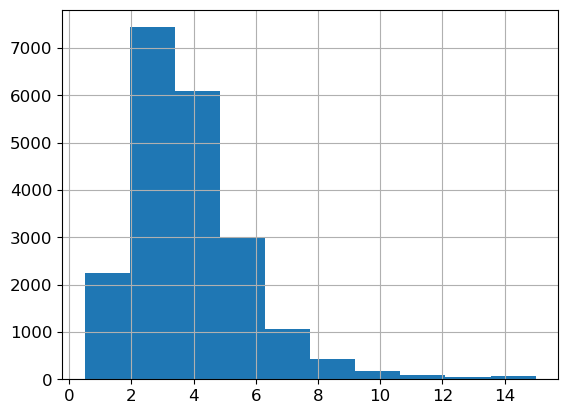

In [28]:
housing["median_income"].hist()

In [29]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

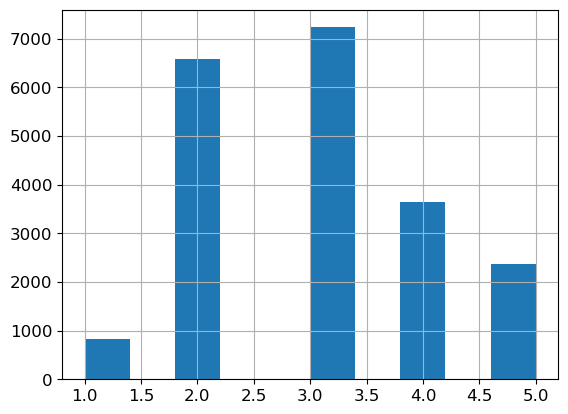

In [30]:
housing["income_cat"].hist()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [35]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

In [37]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

Saving figure bad_visualization_plot


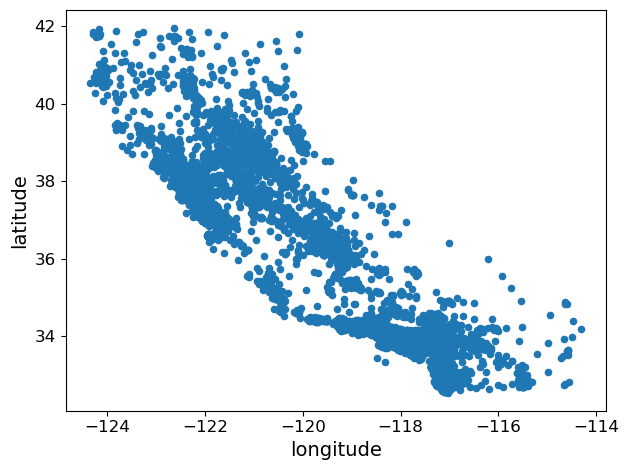

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


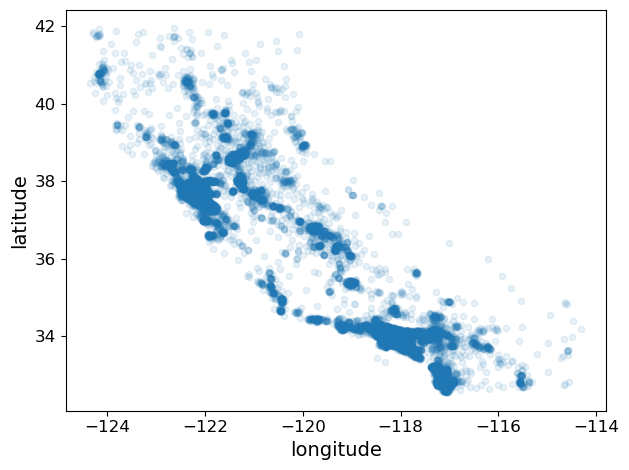

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


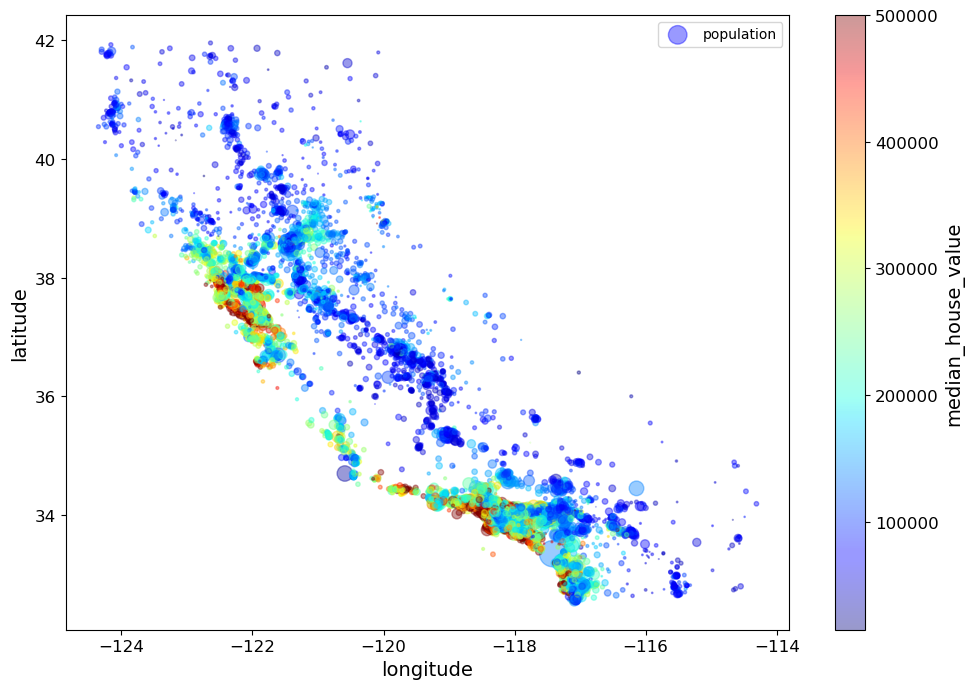

In [51]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

### Looking for Correlations

In [52]:
housing_encoded = pd.get_dummies(housing)
corr_matrix = housing_encoded.corr()

In [53]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687151
ocean_proximity_<1H OCEAN     0.259521
ocean_proximity_NEAR BAY      0.158691
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
ocean_proximity_ISLAND        0.013708
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


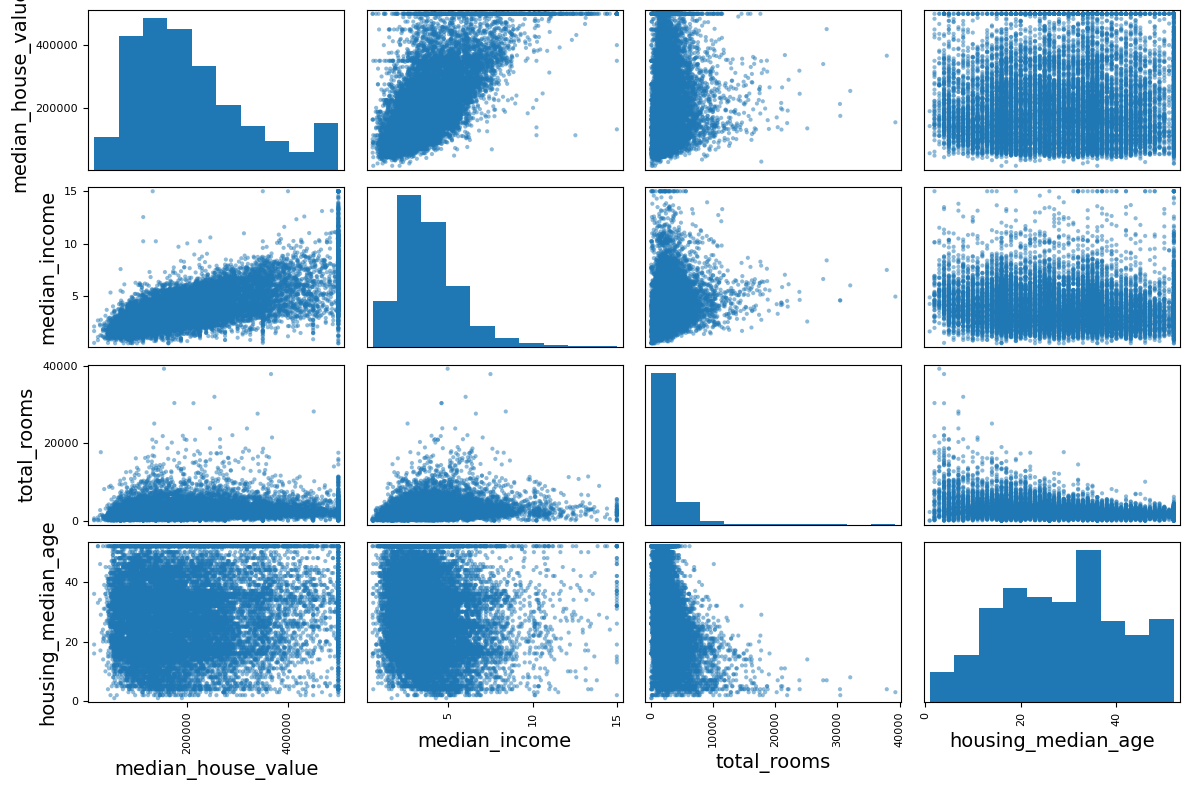

In [54]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


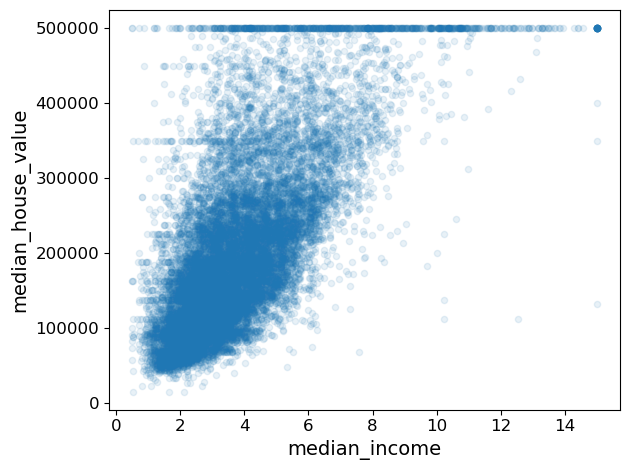

In [56]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
save_fig("income_vs_house_value_scatterplot")

### Experimenting with Attribute Combinations

In [57]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [58]:
housing_encoded = pd.get_dummies(housing)
corr_matrix = housing_encoded.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687151
ocean_proximity_<1H OCEAN     0.259521
ocean_proximity_NEAR BAY      0.158691
rooms_per_household           0.146255
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
ocean_proximity_ISLAND        0.013708
population_per_household     -0.021991
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
bedrooms_per_room            -0.259952
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms

In [59]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [60]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN

In [61]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [62]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

longitude  latitude  housing_median_age  total_rooms  population  \
1606     -122.08     37.88                26.0       2947.0       825.0   
10915    -117.87     33.73                45.0       2264.0      1970.0   
19150    -122.70     38.35                14.0       2313.0       954.0   
4186     -118.23     34.13                48.0       1308.0       835.0   
16885    -122.40     37.58                26.0       3281.0      1145.0   

       households  median_income ocean_proximity  
1606        626.0         2.9330        NEAR BAY  
10915       499.0         3.4193       <1H OCEAN  
19150       397.0         3.7813       <1H OCEAN  
4186        294.0         4.2891       <1H OCEAN  
16885       480.0         6.3580      NEAR OCEAN

In [63]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [65]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964  
...           ...         ...            ...  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319  

[16512 rows x 8 columns]

In [66]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [67]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [68]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [69]:
X = imputer.transform(housing_num)

In [70]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index)

In [71]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income  
1606        825.0       626.0         2.9330  
10915      1970.0       499.0         3.4193  
19150       954.0       397.0         3.7813  
4186        835.0       294.0         4.2891  
16885      1145.0       480.0         6.3580

In [72]:
imputer.strategy

'median'

In [73]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964

### Handling Text and Categorical Attributes

In [76]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

In [77]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [78]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [80]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Custom Transformers

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [82]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [83]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
12655   -121.46    38.52               29.0      3873.0          797.0   
15502   -117.23    33.09                7.0      5320.0          855.0   
2908    -119.04    35.37               44.0      1618.0          310.0   
14053   -117.13    32.75               24.0      1877.0          519.0   
20496    -118.7    34.28               27.0      3536.0          646.0   

      population households median_income ocean_proximity rooms_per_household  \
12655     2237.0      706.0        2.1736          INLAND            5.485836   
15502     2015.0      768.0        6.3373      NEAR OCEAN            6.927083   
2908       667.0      300.0         2.875          INLAND            5.393333   
14053      898.0      483.0        2.2264      NEAR OCEAN            3.886128   
20496     1837.0      580.0        4.4964       <1H OCEAN            6.096552   

      population_per_household  
12655                 3.168555  
15502                 2.623698  
2908                  2.223333  
14053                 1.859213  
20496                 3.167241

### Transformation Pipelines

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [89]:
housing_num_tr[:10]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  0.2512412 ,  0.00610923,
        -0.47451338],
       [-1.23109441,  1.08549869, -0.05196285, -0.66197687, -0.68632833,
        -0.62358295, -0.6521739 , -0.09422376, -0.24916496, -0.01928904,
        -0.075

In [86]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [88]:
housing_prepared[:10] 

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

### Select and Train a Model

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [95]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [96]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [97]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [99]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [100]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [101]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [103]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean: 71432.52332065887
Standard deviation: 2696.6824522410743


In [104]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [105]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [107]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [109]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

### Fine-Tune Your Model

### Grid Search

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [114]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [115]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [117]:
pd.DataFrame(grid_search.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.066931      0.009841         0.003220        0.000236   
1       0.215741      0.019284         0.007921        0.000464   
2       0.642998      0.030512         0.022999        0.001928   
3       0.108294      0.006071         0.003574        0.000429   
4       0.347464      0.019622         0.008273        0.000815   

  param_max_features param_n_estimators param_bootstrap  \
0                  2                  3             NaN   
1                  2                 10             NaN   
2                  2                 30             NaN   
3                  4                  3             NaN   
4                  4                 10             NaN   

                                    params  split0_test_score  \
0   {'max_features': 2, 'n_estimators': 3}      -4.119912e+09   
1  {'max_features': 2, 'n_estimators': 10}      -2.973521e+09   
2  {'max_features': 2, 'n_estimators': 30}      -2.801229e+09   
3   {'max_features': 4, 'n_estimators': 3}      -3.528743e+09   
4  {'max_features': 4, 'n_estimators': 10}      -2.742620e+09   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -3.723465e+09  ...    -4.082592e+09    1.867375e+08               18   
1      -2.810319e+09  ...    -3.015803e+09    1.139808e+08               11   
2      -2.671474e+09  ...    -2.796915e+09    7.980892e+07                9   
3      -3.490303e+09  ...    -3.609050e+09    1.375683e+08               16   
4      -2.609311e+09  ...    -2.755726e+09    1.182604e+08                7   

   split0_train_score  split1_train_score  split2_train_score  \
0       -1.155630e+09       -1.089726e+09       -1.153843e+09   
1       -5.982947e+08       -5.904781e+08       -6.123850e+08   
2       -4.412567e+08       -4.326398e+08       -4.553722e+08   
3       -9.782368e+08       -9.806455e+08       -1.003780e+09   
4       -5.063215e+08       -5.257983e+08       -5.081984e+08   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -1.118149e+09       -1.093446e+09     -1.122159e+09     2.834288e+07  
1       -5.727681e+08       -5.905210e+08     -5.928894e+08     1.284978e+07  
2       -4.320746e+08       -4.311606e+08     -4.385008e+08     9.184397e+06  
3       -1.016515e+09       -1.011270e+09     -9.980896e+08     1.577372e+07  
4       -5.174405e+08       -5.282066e+08     -5.171931e+08     8.882622e+06  

[5 rows x 23 columns]

### Randomized Search

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f23e2a84640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f23e9257bb0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [119]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [120]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [121]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [122]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47873.26095812988

In [123]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

We could compute the interval manually like this:

In [124]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

In [125]:
# z-scores
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.92103065038)

### Exercise solutions
### 1.

Question: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.1s
[CV] END .............................C=100.0, kernel=linear; total time=   7.4s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [127]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.6183460516

In [128]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of C is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for C (removing the smallest values), because it is likely that higher values of C will be better.

### 2.

Question: Try replacing GridSearchCV with RandomizedSearchCV.

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.8s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.8s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f23eaa51370>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f23eaa51430>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [130]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256623

In [131]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

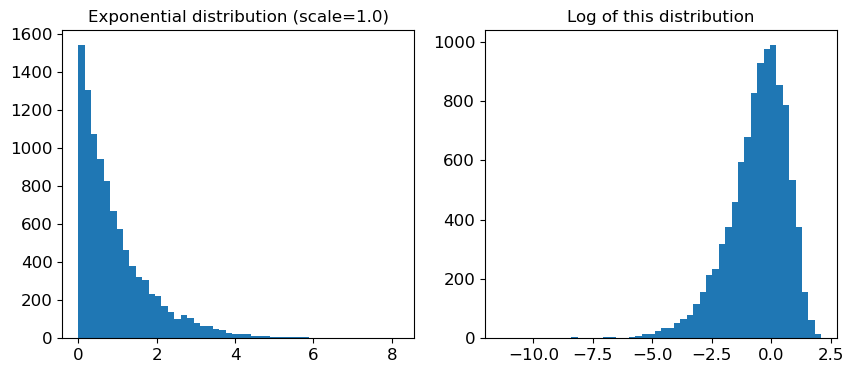

In [132]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

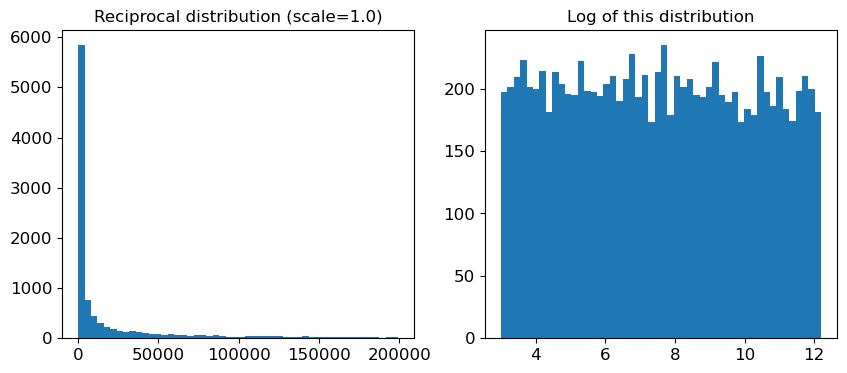

In [133]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

### 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [135]:
k = 5

In [136]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [137]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [138]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [139]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [140]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [141]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [142]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

### 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [143]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [144]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [145]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439233  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best RandomForestRegressor that we found earlier, rather than the best SVR.

### 5.

Question: Automatically explore some preparation options using GridSearchCV.

In [146]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   7.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   7.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   7.4s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   7.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   7.6s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.3s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   6.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   8.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   7.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   7.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   7.7s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   7.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  15.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   7.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   7.4s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.4s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.3s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.5s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.5s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   6.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   7.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   7.6s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   6.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   7.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   7.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   7.8s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   6.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   7.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   7.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   6.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   8.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   7.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   7.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   8.0s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   8.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   7.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   7.8s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   7.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   7.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   6.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   7.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   7.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   7.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   7.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   7.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   8.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   7.7s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   8.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   8.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   8.7s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   8.2s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   8.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   8.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   8.2s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   9.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   9.1s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   9.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   9.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   9.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   7.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   9.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  10.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   9.8s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  10.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  11.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  11.7s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  12.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  11.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  12.4s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   8.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  12.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  11.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  10.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  12.2s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  13.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  11.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  14.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  13.0s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  10.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  13.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  13.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  13.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  13.2s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  12.4s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  14.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  14.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  14.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  12.8s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  15.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  14.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  15.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  13.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  14.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  13.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  16.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  14.3s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  14.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  14.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  15.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  15.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  15.4s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  12.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  16.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  16.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  16.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  14.9s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  14.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  14.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  13.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.0s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  17.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  14.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  16.4s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  15.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  15.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  16.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  17.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  14.6s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  15.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  14.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.2s


/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  15.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  14.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  17.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  15.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  15.7s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  17.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  16.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  17.3s
[CV] 

/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/srinija2001/miniconda3/envs/mle-dev/lib/python3.8/site-packages/sklearn/pip

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [147]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}